Mean Squared Error: 120286368.44645047


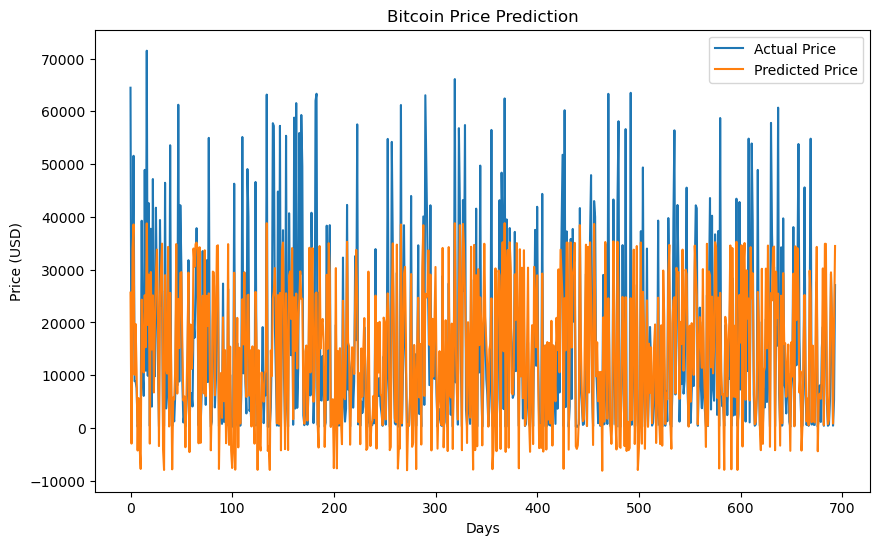

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch real-time Bitcoin price data from Coinbase API
response = requests.get('https://api.coinbase.com/v2/prices/BTC-USD/spot')
btc_price = response.json()['data']['amount']

# Load historical Bitcoin price data from Yahoo Finance API
btc_data = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=0&period2=9999999999&interval=1d&events=history")

# Preprocess data
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Feature engineering - Adding new features
btc_data['Day'] = btc_data.index.day
btc_data['Month'] = btc_data.index.month
btc_data['Year'] = btc_data.index.year

# Define features and target
X = btc_data[['Day', 'Month', 'Year']].values
y = btc_data['Close'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
